# Przekształcenia wstępne szeregu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [3]:
#funkcja do badania stacjonarności

def check_time_series_stationary(y, rolling_len=12):
    
    y = pd.Series(y)
    df_test = adfuller(y)
    
    if df_test[1] < 0.05:
        print('Szereg jest stacjonarny')
    
    else:
        print('Szereg jest niestacjonarny')
    
    print("{0:^32s}".format("Dickey-Fuller Test"))
    print("-"*32+"\n")
    
    print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
    print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
    print("-"*32+"\n")
    
    rolling_mean = y.rolling(rolling_len).mean()
    rolling_var = y.rolling(rolling_len).var()

    plt.plot(y)
    plt.plot(rolling_mean, label="Rolling mean")
    plt.plot(rolling_var, label="Rolling var")
    plt.legend()
    plt.show()
    
    print("{0:^32s}".format("Autocorrelation plot"))
    print("-"*32+"\n")
    
    pd.plotting.autocorrelation_plot(y)
    plt.show()

Chcemy umieć odwzorować zmiany w szeregu za pomocą modeli. Najłatwiej jest zamodelować szeregi stacjonarne. Tak więc przed przystąpieniem do analizy i prognozowania szeregów powinniśmy odpowiednio przygotować nasze dane.

Przy użyciu określonych przekształceń, możemy 
- wyeliminować z szeregu składowe zmienności,
- ułatwić identyfikację regularnych tendencji.

## Transformacja logarytmiczna

Jeśli w analizowanych danych dostrzegamy, że wariancja wzrasta lub maleje wraz z poziomem szeregu, przydatne może być zastosowanie transformacji logarytmicznej.

Używająć logarytmu, możemy ustabilizować wariancję, a potem kontynuawać kolejne kroki analizy.
Stabilizacja wariancji jest konieczna dla zastosowania modeli stacjonarnych.

**Transformacja logarytmiczna/potęgowa danych przydatna jest między innymi w następujących przypadkach:**
- występowanie wzrostu (lub spadku) amplitudy wahań sezonowych w kolejnych okresach, 
- niejednorodnej zmienności danych w kolejnych okresach,
- dużego wpływu obserwacji odstających

In [4]:
air_passengers = pd.read_csv('../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     0.8154
p-value             :     0.9919
--------------------------------



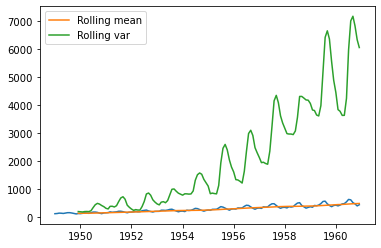

      Autocorrelation plot      
--------------------------------



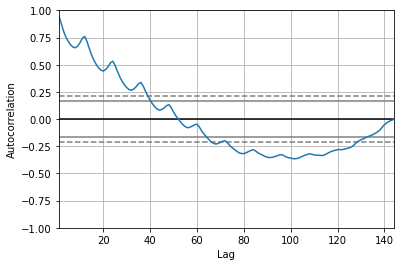

In [5]:
check_time_series_stationary(air_passengers['#Passengers'])

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -1.7170
p-value             :     0.4224
--------------------------------



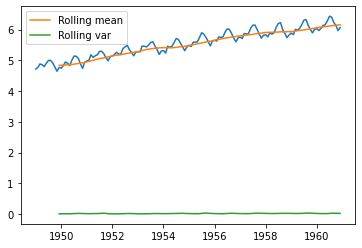

      Autocorrelation plot      
--------------------------------



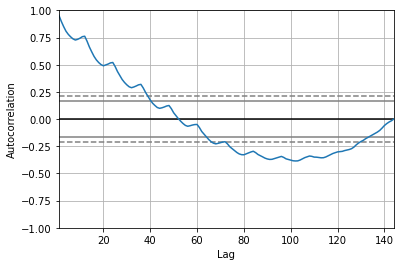

In [6]:
log_air_passengers = np.log(air_passengers)
check_time_series_stationary(log_air_passengers['#Passengers'])

## Różnicowanie 

Operację różnicowania stosujemy między innymi w celu przekształcenia danych do postaci **stacjonarnej**.

Róznicowanie sprowadza się do zastąpienia oryginalnych danych szeregiem różnic, wyznaczonych dla ustalonych opóźnień czasowych. Dobierając odpowiednio parametry różnicowania możemy wyeliminować z danych trend liniowy, kwadratowy, wielomianowy, a także sezonowość. 

### Róźnicowanie z opóźnieniem 1

Wczytaj dane `USGDP.csv` przedstawiające informację na temat kwartalnego produktu krajowego brutto w USA w latach 1947-2006, a następnie zastosuj różnicowanie z opóźnieniem 1 i sprawdź stacjonarność otrzymanego szeregu.

In [7]:
usgdp = pd.read_csv('../data/USGDP.csv', parse_dates=['DATE'], index_col='DATE')
usgdp.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     2.9819
p-value             :     1.0000
--------------------------------



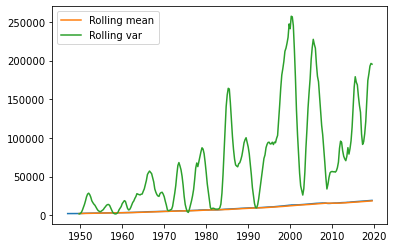

      Autocorrelation plot      
--------------------------------



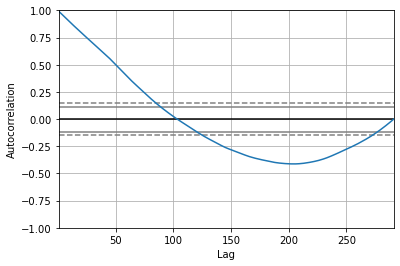

In [8]:
check_time_series_stationary(usgdp.GDPC1)

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.1605
p-value             :     0.2209
--------------------------------



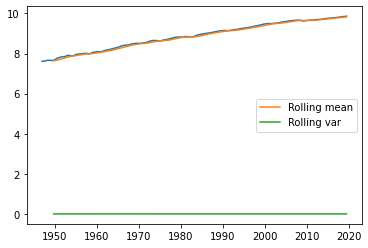

      Autocorrelation plot      
--------------------------------



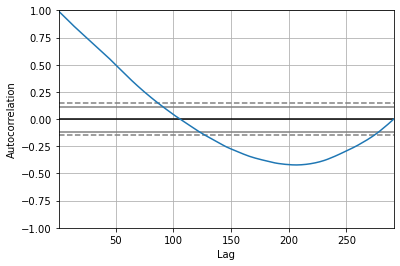

In [9]:
log_usgdp = np.log(usgdp)
check_time_series_stationary(log_usgdp.GDPC1)

In [10]:
# różnicowanie z krokiem 1

log_usgdp_diff = log_usgdp.diff(1)
log_usgdp_diff

,GDPC1
DATE,
1947-01-01,NaN
1947-04-01,-0.002670
1947-07-01,-0.002067
1947-10-01,0.015521
1948-01-01,0.014931
...,...
2018-07-01,0.007210
2018-10-01,0.002710
2019-01-01,0.007623


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -8.4548
p-value             :     0.0000
--------------------------------



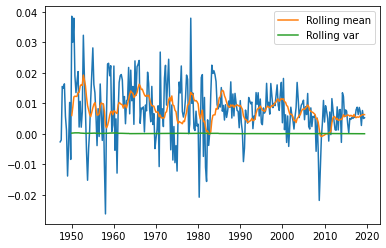

      Autocorrelation plot      
--------------------------------



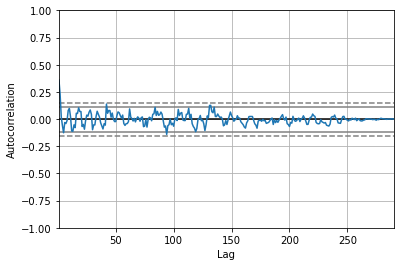

In [11]:
check_time_series_stationary(log_usgdp_diff.GDPC1.dropna())

### Róźnicowanie z opóźnieniem sezonowym

Różnicowanie szeregu zawierające dwie składowe systematyczne -- trend i sezonowość.

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -1.7170
p-value             :     0.4224
--------------------------------



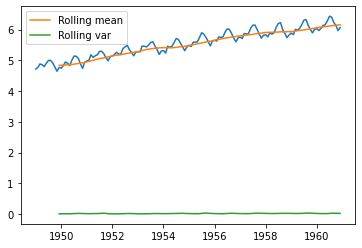

      Autocorrelation plot      
--------------------------------



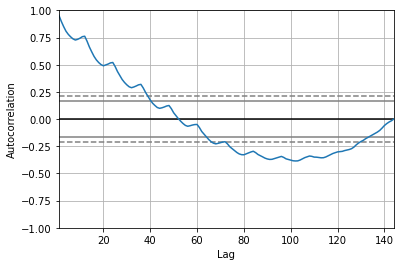

In [12]:
log_air_passengers = np.log(air_passengers)
check_time_series_stationary(log_air_passengers['#Passengers'])

In [13]:
log_air_passengers

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [14]:
log_air_passengers_diff = log_air_passengers.diff(1)
log_air_passengers_diff

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -2.7171
p-value             :     0.0711
--------------------------------



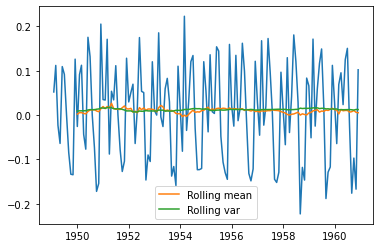

      Autocorrelation plot      
--------------------------------



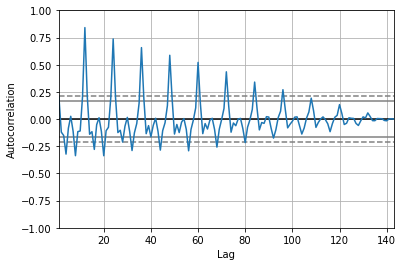

In [15]:
check_time_series_stationary(log_air_passengers_diff['#Passengers'].dropna())

In [16]:
log_air_passengers_diff_diff12 = log_air_passengers_diff.diff(12)
log_air_passengers_diff_diff12

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-0.045934
1960-09-01,0.012024
1960-10-01,0.031830


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.4433
p-value             :     0.0002
--------------------------------



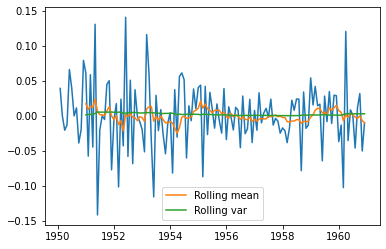

      Autocorrelation plot      
--------------------------------



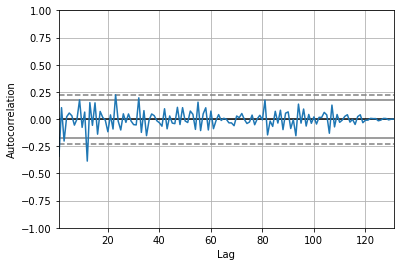

In [17]:
check_time_series_stationary(log_air_passengers_diff_diff12['#Passengers'].dropna())

## Zadanie - `co2`

Wczytaj dane `co2_interpolated.csv` wskazujące stężenie CO2 w atmosferze (więcej pod [linkiem](https://datahub.io/core/co2-ppm)). Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [18]:
co2 = pd.read_csv('../data/co2_interpolated.csv', parse_dates=['Date'], index_col='Date')
co2.head()

,CO2
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     4.7749
p-value             :     1.0000
--------------------------------



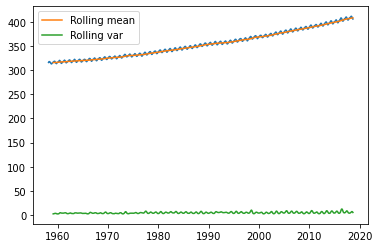

      Autocorrelation plot      
--------------------------------



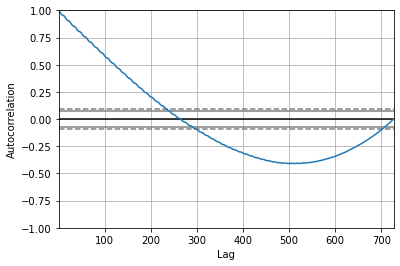

In [19]:
check_time_series_stationary(co2.CO2)

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -5.2874
p-value             :     0.0000
--------------------------------



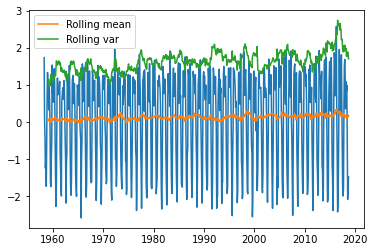

      Autocorrelation plot      
--------------------------------



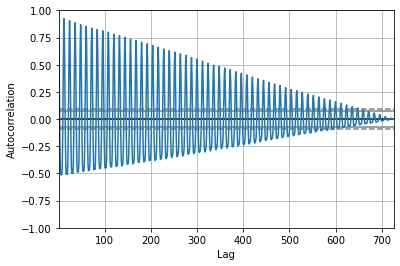

In [21]:
check_time_series_stationary(co2.CO2)

co2_diff = co2.diff(1)

check_time_series_stationary(co2_diff.CO2.dropna())

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -3.6984
p-value             :     0.0041
--------------------------------



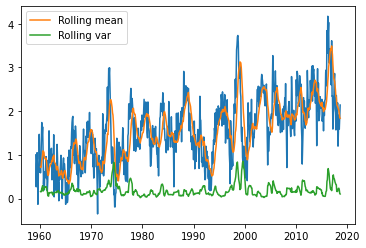

      Autocorrelation plot      
--------------------------------



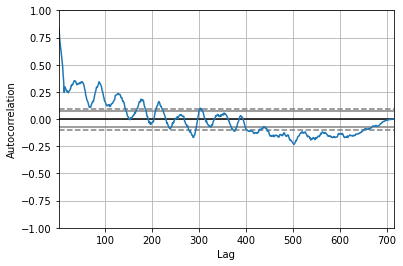

In [26]:
co2_diff12 = co2.diff(12)

check_time_series_stationary(co2_diff12.CO2.dropna())

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :   -10.8713
p-value             :     0.0000
--------------------------------



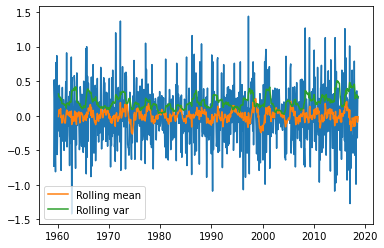

      Autocorrelation plot      
--------------------------------



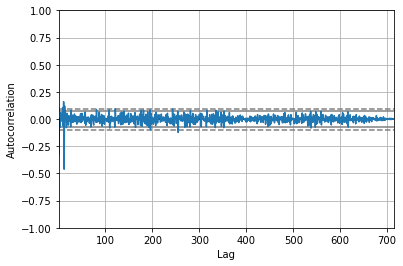

In [27]:
# złożenie dwóch poprzednich operacji

co2_diff12_2 = co2_diff.diff(12)

check_time_series_stationary(co2_diff12_2.CO2.dropna())

## Zadanie - `a10`
Wczytaj dane ` a10.csv` opisujące miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [32]:
a10 = pd.read_csv('../data/a10.csv', parse_dates=['date'], index_col='date')
a10.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :     3.1452
p-value             :     1.0000
--------------------------------



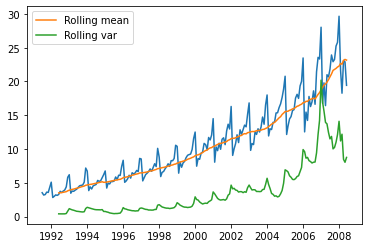

      Autocorrelation plot      
--------------------------------



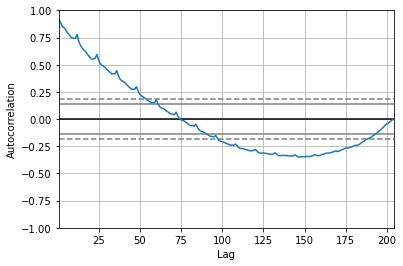

In [33]:
check_time_series_stationary(a10.value)

Szereg jest niestacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -0.9887
p-value             :     0.7574
--------------------------------



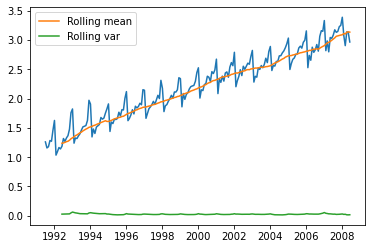

      Autocorrelation plot      
--------------------------------



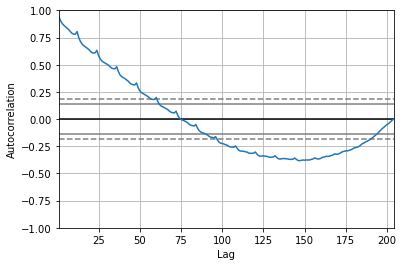

In [34]:
log_a10 = np.log(a10)
check_time_series_stationary(log_a10.value)

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -5.2146
p-value             :     0.0000
--------------------------------



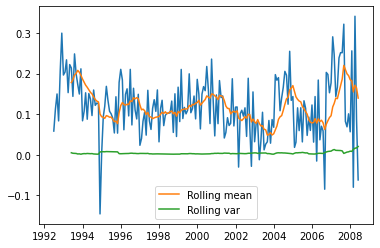

      Autocorrelation plot      
--------------------------------



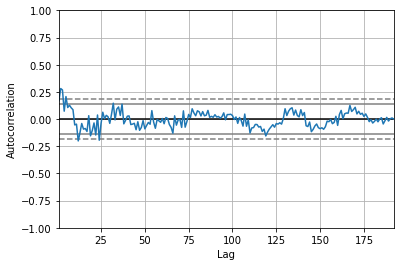

In [36]:
log_a10_diff = log_a10.diff(12)
check_time_series_stationary(log_a10_diff.value.dropna())

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.7855
p-value             :     0.0001
--------------------------------



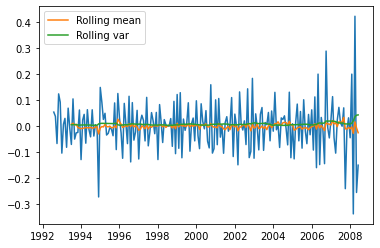

      Autocorrelation plot      
--------------------------------



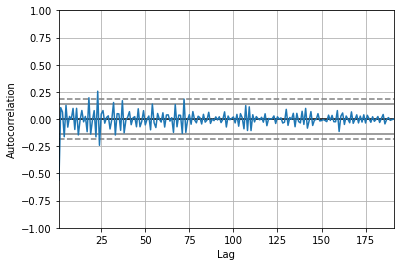

In [37]:
log_a10_diff_2 = log_a10.diff(1).diff(12)
check_time_series_stationary(log_a10_diff_2.value.dropna())

## Zadanie - `daily-min-temperatures`
Wczytaj dane `daily-min-temperatures.csv` opisujący minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [38]:
daily_temp = pd.read_csv('../data/daily-min-temperatures.csv', parse_dates=['Date'], index_col='Date')
daily_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.4448
p-value             :     0.0002
--------------------------------



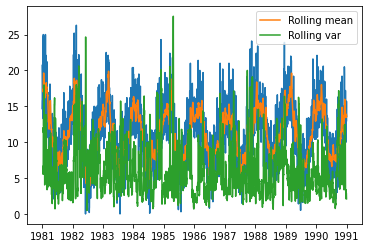

      Autocorrelation plot      
--------------------------------



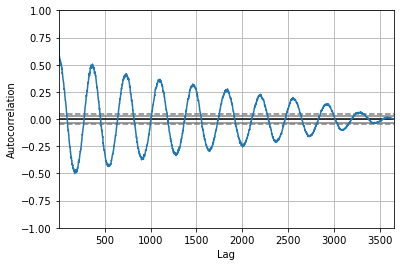

In [39]:
check_time_series_stationary(daily_temp.Temp)

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :   -18.1164
p-value             :     0.0000
--------------------------------



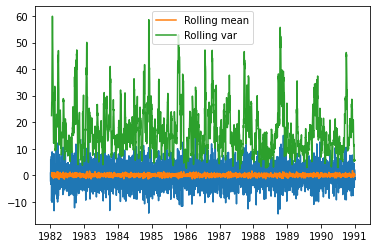

      Autocorrelation plot      
--------------------------------



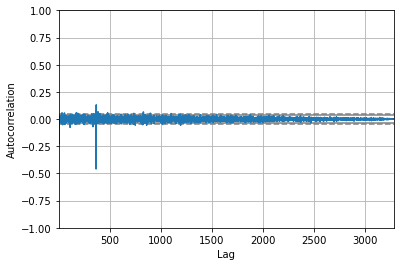

In [46]:
daily_temp_diff = daily_temp.diff(1).diff(365)
check_time_series_stationary(daily_temp_diff.Temp.dropna())

## Zadanie - `daily-total-female-births`
Wczytaj dane `daily-total-female-births.csv` przedstawiające całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [28]:
daily_birth = pd.read_csv('../data/daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')
daily_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.8083
p-value             :     0.0001
--------------------------------



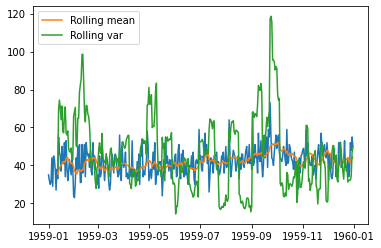

      Autocorrelation plot      
--------------------------------



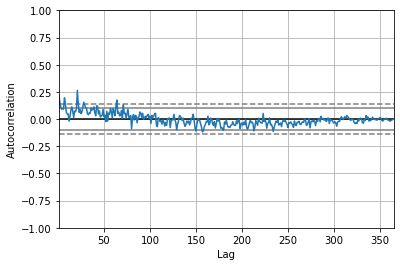

In [29]:
check_time_series_stationary(daily_birth.Births)

Szereg jest stacjonarny
       Dickey-Fuller Test       
--------------------------------

Test Statistic      :    -4.3532
p-value             :     0.0004
--------------------------------



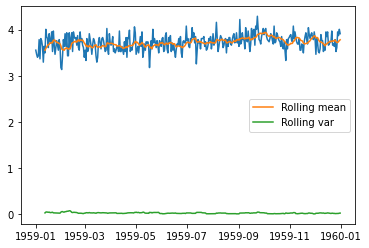

      Autocorrelation plot      
--------------------------------



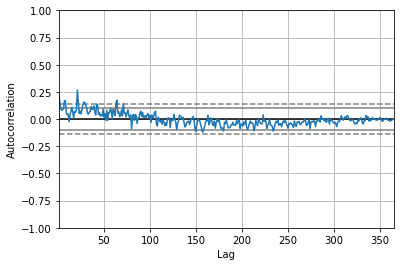

In [30]:
log_daily_birth = np.log(daily_birth)
check_time_series_stationary(log_daily_birth.Births)